In [79]:
import numpy as np
import pandas as pd
import talib

In [81]:
import random
random.seed(42)

In [82]:
# Creating df

df = pd.read_csv('PSE.csv',thousands=',')
df = df.dropna()
df = df[['Open', 'High', 'Low', 'Close']]
df.head()

,Open,High,Low,Close
0,1592.86,1618.15,1590.02,1618.15
1,1617.38,1648.85,1611.64,1648.85
2,1673.89,1698.76,1673.89,1691.68
3,1694.76,1726.17,1688.84,1726.17
4,1727.11,1786.05,1710.56,1778.51


In [84]:
# Converting Strings to float

df=df.astype(float)

In [85]:
#Forming the columns for strategy. Read the readme.txt for strategy names

df['H-L'] = df['High'] - df['Low']
df['O-C'] = df['Close'] - df['Open']
df['3day MA'] = df['Close'].shift(1).rolling(window = 3).mean()
df['10day MA'] = df['Close'].shift(1).rolling(window = 10).mean()
df['30day MA'] = df['Close'].shift(1).rolling(window = 30).mean()
df['Std_dev']= df['Close'].rolling(5).std()
df['RSI'] = talib.RSI(df['Close'].values, timeperiod = 9)
df['Williams %R'] = talib.WILLR(df['High'].values, df['Low'].values, df['Close'].values, 7)
df.head()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R
0,1592.86,1618.15,1590.02,1618.15,28.13,25.29,NaN,NaN,NaN,NaN,NaN,NaN
1,1617.38,1648.85,1611.64,1648.85,37.21,31.47,NaN,NaN,NaN,NaN,NaN,NaN
2,1673.89,1698.76,1673.89,1691.68,24.87,17.79,NaN,NaN,NaN,NaN,NaN,NaN
3,1694.76,1726.17,1688.84,1726.17,37.33,31.41,1652.893333,NaN,NaN,NaN,NaN,NaN
4,1727.11,1786.05,1710.56,1778.51,75.49,51.40,1688.900000,NaN,NaN,63.176654,NaN,NaN


In [86]:
# Adding a column for price rise Boolean

df['Price_Rise'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
0,1592.86,1618.15,1590.02,1618.15,28.13,25.29,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1617.38,1648.85,1611.64,1648.85,37.21,31.47,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1673.89,1698.76,1673.89,1691.68,24.87,17.79,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1694.76,1726.17,1688.84,1726.17,37.33,31.41,1652.893333,NaN,NaN,NaN,NaN,NaN,1
4,1727.11,1786.05,1710.56,1778.51,75.49,51.40,1688.900000,NaN,NaN,63.176654,NaN,NaN,0


In [87]:
# Removing NaN from the dataframe

df = df.dropna()
df.head()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
30,1802.04,1817.75,1798.91,1800.89,18.84,-1.15,1829.250000,1903.687,1876.907333,30.603939,37.462391,-55.243489,0
31,1797.86,1801.94,1756.01,1762.29,45.93,-35.57,1813.420000,1883.763,1882.998667,40.206303,32.848238,-67.881247,0
32,1745.91,1782.58,1696.31,1700.82,86.27,-45.09,1782.630000,1858.498,1886.780000,56.155002,26.910212,-91.537896,1
33,1700.82,1717.98,1691.69,1711.81,26.29,10.99,1754.666667,1828.287,1887.084667,44.160601,29.474480,-85.761589,1
34,1718.87,1782.94,1717.88,1782.94,65.06,64.07,1724.973333,1806.487,1886.606000,43.839810,43.824728,-50.215505,1


In [88]:
# Separating features and label. From H-L column to Std_dev will be the features

X = df.iloc[:, 4:-1]
y = df.iloc[:, -1]

In [89]:
#  Train Test Split

split = int(len(df)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [90]:
# Standardizing the data to remove the bias to the different scales of input features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
# Define the model. A Sequential model with 128 Input and Hidden Dense layers and a single Output layer
#I'm using Mean squared error as the loss function

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])


In [92]:
# Fit the model

classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
7312/7312 [==============================] - 1s 127us/step - loss: 0.2461 - acc: 0.5479
Epoch 2/100
7312/7312 [==============================] - 1s 84us/step - loss: 0.2448 - acc: 0.5609
Epoch 3/100
7312/7312 [==============================] - 1s 78us/step - loss: 0.2443 - acc: 0.5577
Epoch 4/100
7312/7312 [==============================] - 1s 80us/step - loss: 0.2435 - acc: 0.5647
Epoch 5/100
7312/7312 [==============================] - 1s 80us/step - loss: 0.2427 - acc: 0.5667
Epoch 6/100
7312/7312 [==============================] - 1s 80us/step - loss: 0.2419 - acc: 0.5598
Epoch 7/100
7312/7312 [==============================] - 1s 82us/step - loss: 0.2415 - acc: 0.5658
Epoch 8/100
7312/7312 [==============================] - 1s 84us/step - loss: 0.2414 - acc: 0.5688
Epoch 9/100
7312/7312 [==============================] - 1s 84us/step - loss: 0.2407 - acc: 0.5622
Epoch 10/100
7312/7312 [==============================] - 1s 93us/step - loss: 0.2402 - acc: 0.5708
Epoch 11

Epoch 83/100
7312/7312 [==============================] - 1s 91us/step - loss: 0.1755 - acc: 0.7355
Epoch 84/100
7312/7312 [==============================] - 1s 76us/step - loss: 0.1753 - acc: 0.7293
Epoch 85/100
7312/7312 [==============================] - 1s 75us/step - loss: 0.1745 - acc: 0.7302
Epoch 86/100
7312/7312 [==============================] - 1s 77us/step - loss: 0.1735 - acc: 0.7359
Epoch 87/100
7312/7312 [==============================] - 1s 75us/step - loss: 0.1725 - acc: 0.7380
Epoch 88/100
7312/7312 [==============================] - 1s 76us/step - loss: 0.1702 - acc: 0.7448
Epoch 89/100
7312/7312 [==============================] - 1s 77us/step - loss: 0.1715 - acc: 0.7340
Epoch 90/100
7312/7312 [==============================] - 1s 84us/step - loss: 0.1696 - acc: 0.7362
Epoch 91/100
7312/7312 [==============================] - 1s 77us/step - loss: 0.1692 - acc: 0.7432
Epoch 92/100
7312/7312 [==============================] - 1s 76us/step - loss: 0.1672 - acc: 0.7492


In [93]:
# Predicting output and converting it to boolean

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [94]:
# Adding a y_pred column to dataframe and storing its result in the last len(y_pred) rows

df['y_pred'] = np.NaN
df.iloc[(len(df) - len(y_pred)):,-1:] = y_pred
trade_dataset = df.dropna()

In [95]:
# Using the trade_dataset (with y_pred) to predict the next day returns

trade_dataset['Tomorrows Returns'] = 0
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [99]:
# Initializing the strategy returns to previously claculated tomorrow returns and -Tomorrow returns
# for True and False respectively

trade_dataset['Strategy Returns'] = 0
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
# Calculating cummulative returns

trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\talha\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


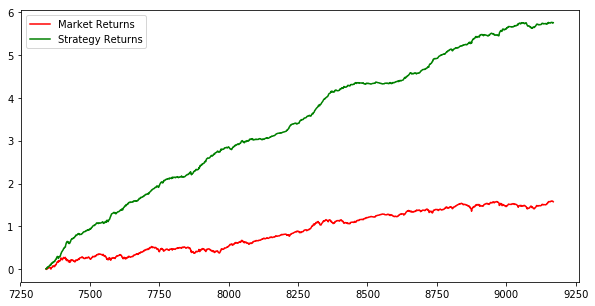

In [101]:
# Plotting the Market Returns vs Strategy Returns

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()